In [12]:
from IPython.display import HTML
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [111]:
x = np.linspace(0, 4, 1000)
ts = np.linspace(0, 4, 100)
def sig(t):
    return np.exp(-(t-x)**2)*np.cos(2*2*np.pi*(t-x))
def sig(t):
    s = np.zeros_like(x)
    s[np.abs(t-x+0.1)<0.1] = 1
    return s
def sig_msg(t):
    return sig(t) - sig(t+0.2) + sig(t+0.4) + sig(t+0.6) - sig(t+0.8)

In [131]:
order = 10  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

In [139]:
order = 6  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
ripple_db = 3  # Maximum ripple allowed below unity gain in passband (in dB)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.cheby1(order, ripple_db, normal_cutoff, btype='low', analog=False)

In [123]:
order = 10  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.bessel(order, normal_cutoff, btype='low', analog=False)

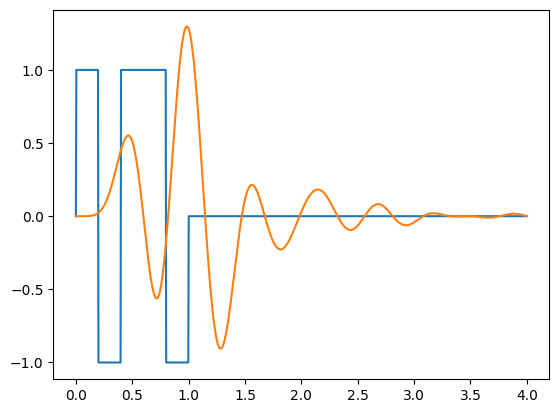

In [140]:
filtered_sig = lambda t: signal.lfilter(b, a, sig_msg(t))
fig, ax = plt.subplots()
ax.plot(x, sig_msg(0), label='Original signal')
ax.plot(x, filtered_sig(0), label='Filtered signal')
plt.show()

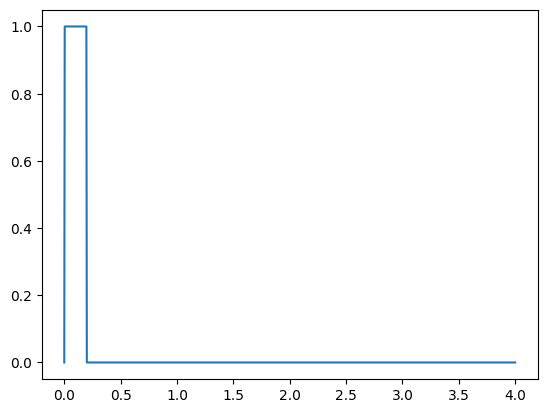

In [91]:
# wave packet
fig, ax = plt.subplots()
line, = ax.plot(x, sig(0))
def animate(t):
    line.set_ydata(sig(t))
    return line,
ani = animation.FuncAnimation(fig, animate, frames=ts)
html_ani = HTML(ani.to_jshtml())
html_ani

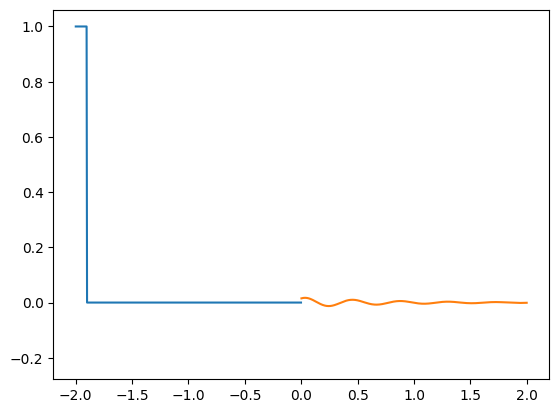

In [57]:
fig, ax = plt.subplots()

line1, = ax.plot(x[x<0], sig(0)[x<0], label='Original signal')
line2, = ax.plot(x[x>0], filtered_sig(0)[x>0], label='Filtered signal')

def animate(t):
    line1.set_ydata(sig(t)[x<0])
    line2.set_ydata(filtered_sig(t)[x>0])
    return line1, line2,

ani = animation.FuncAnimation(fig, animate, frames=ts)
html_ani = HTML(ani.to_jshtml())
html_ani